# <span style="color:black;">Importation des Bibliothèques et Préparation des Outils pour l'Analyse
</span>


In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# <span style="color:black;">Préparation et Prétraitement des Données pour la Détection de Fraude
</span>


## <span style="color:black;">Chargement des datasets</span>


In [3]:
df_train = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTrain.csv')
df_test = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTest.csv')

## <span style="color:black;">Suppression des colonnes inutiles
</span>


In [4]:
df_train.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)
df_test.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)

## <span style="color:black;">Conversion et Encodage des Colonnes</span>


In [5]:
# Conversion des colonnes de dates en timestamps
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time']).apply(lambda x: x.timestamp())
df_train['dob'] = pd.to_datetime(df_train['dob']).apply(lambda x: x.timestamp())

In [6]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = [ 'category', 'city', 'state','dob']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    df_train[col] = encoder.fit_transform(df_train[col])

In [7]:
# List of columns to encode
columns_to_encode = ['category', 'city', 'state','dob']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    df_test[col] = encoder.fit_transform(df_test[col])

# The rest of your numeric columns should already be in the correct format

df_test ['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test ['trans_date_trans_time'] = df_test ['trans_date_trans_time'].apply(lambda x: x.timestamp())

## <span style="color:black;">Séparation des features et de la target
</span>


In [8]:
X = df_train .drop(columns=['is_fraud'])
Y = df_train ['is_fraud']

## <span style="color:black;">Normalisation des features

</span>


In [9]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

## <span style="color:black;">Séparation des données en train et test
</span>


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# <span style="color:black;">Entraînement du Modèle de Randomforest [Sans / Avec] SMOTE</span>


## <span style="color:black;">Sans SMOTE</span>

In [11]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred_forest = random_forest.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle de Randomforest</span>


In [13]:
# Prédire sur les données de test avec le modèle Random Forest
y_pred_forest = random_forest.predict(X_test)

# Calculer l'accuracy
accuracy_without_smote = accuracy_score(Y_test, y_pred_forest)

# Obtenir le rapport de classification sous forme de dictionnaire
report_without_smote = classification_report(Y_test, y_pred_forest, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_without_smote = pd.DataFrame(report_without_smote).transpose()

# Ajouter l'accuracy au DataFrame une seule fois
accuracy_df_without_smote = pd.DataFrame({'precision': [accuracy_without_smote], 'recall': [accuracy_without_smote], 'f1-score': [accuracy_without_smote], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_without_smote = pd.concat([report_df_without_smote.loc[['0', '1']], accuracy_df_without_smote])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle Random Forest sans SMOTE")
print(report_df_without_smote)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_without_smote = report_without_smote['0']['f1-score']
f1_score_class_1_without_smote = report_without_smote['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0_without_smote:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_without_smote:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro_without_smote = f1_score(Y_test, y_pred_forest, average='macro')
f1_micro_without_smote = f1_score(Y_test, y_pred_forest, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_without_smote:.4f}")
print(f"F1-Score (micro): {f1_micro_without_smote:.4f}")


Modèle Random Forest sans SMOTE
          precision    recall  f1-score   support
0          0.998326  0.999352  0.998839  257834.0
1          0.864887  0.712192  0.781147    1501.0
accuracy   0.997690  0.997690  0.997690  259335.0

F1-Score (classe 0): 0.9988
F1-Score (classe 1): 0.7811

F1-Score (macro): 0.8900
F1-Score (micro): 0.9977


## <span style="color:black;">Avec SMOTE</span>

In [14]:
# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)



In [15]:
# Entraîner le modèle Random Forest sur les données équilibrées
random_forest.fit(X_train_smote, Y_train_smote)

RandomForestClassifier(random_state=42)

In [16]:
# Prédire sur les données de test
y_pred_forest_smote = random_forest.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle d'arbre de Randomforest</span>


In [16]:
# Calculer l'accuracy
accuracy_with_smote = accuracy_score(Y_test, y_pred_forest_smote)

# Obtenir le rapport de classification sous forme de dictionnaire
report_with_smote = classification_report(Y_test, y_pred_forest_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_with_smote = pd.DataFrame(report_with_smote).transpose()

# Ajouter l'accuracy au DataFrame une seule fois
accuracy_df_with_smote = pd.DataFrame({'precision': [accuracy_with_smote], 'recall': [accuracy_with_smote], 'f1-score': [accuracy_with_smote], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_with_smote = pd.concat([report_df_with_smote.loc[['0', '1']], accuracy_df_with_smote])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle Random Forest avec SMOTE")
print(report_df_with_smote)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_with_smote = report_with_smote['0']['f1-score']
f1_score_class_1_with_smote = report_with_smote['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0_with_smote:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_with_smote:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro_with_smote = f1_score(Y_test, y_pred_forest_smote, average='macro')
f1_micro_with_smote = f1_score(Y_test, y_pred_forest_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_with_smote:.4f}")
print(f"F1-Score (micro): {f1_micro_with_smote:.4f}")


Modèle Random Forest avec SMOTE
          precision    recall  f1-score   support
0          0.998863  0.998266  0.998565  257834.0
1          0.729909  0.804797  0.765526    1501.0
accuracy   0.997147  0.997147  0.997147  259335.0

F1-Score (classe 0): 0.9986
F1-Score (classe 1): 0.7655

F1-Score (macro): 0.8820
F1-Score (micro): 0.9971


# <span style="color:black;">Evaluation du Modèle de Randomforest [Sans / Avec] SMOTE</span>


## <span style="color:black;">GRAPHES</span>


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Pour configurer l'affichage des graphiques avec un style plus moderne
sns.set(style="whitegrid")


## <span style="color:black;">Évaluation des Modèles : Courbes ROC avec et sans SMOTE</span>


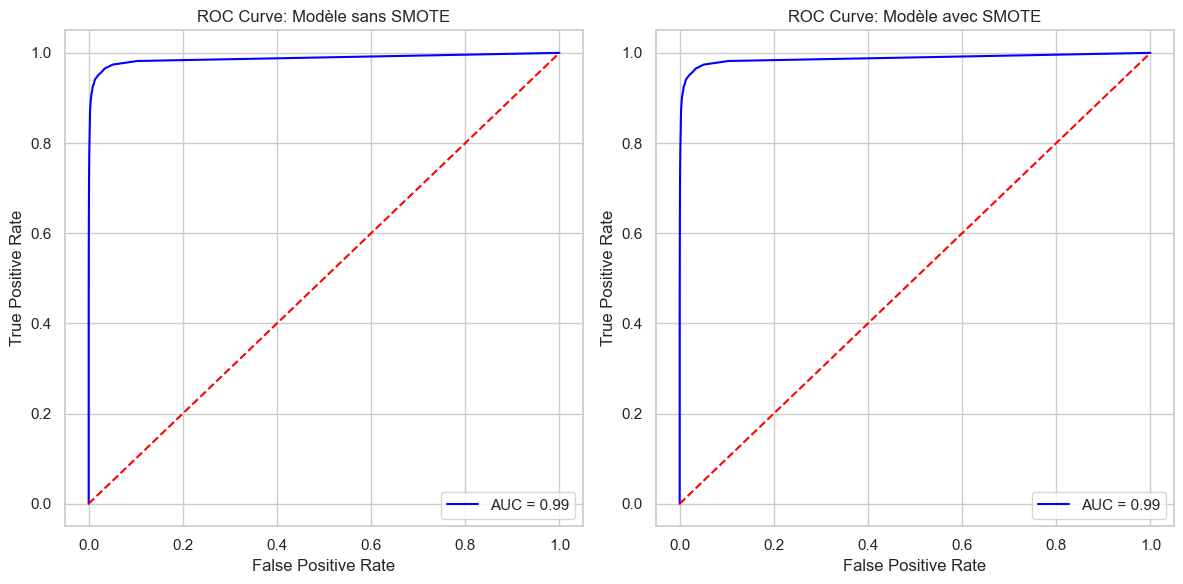

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(ax, y_true, y_pred_prob, title):
    # Calcul des taux de faux positifs et vrais positifs
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    # Calcul de l'AUC (Area Under the Curve)
    auc_score = roc_auc_score(y_true, y_pred_prob)

    # Tracer la courbe ROC
    ax.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ligne diagonale de référence
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve: {title}')
    ax.legend(loc='lower right')

# Prédictions probabilistes pour les modèles sans et avec SMOTE
y_test_pred_prob_without_smote = random_forest.predict_proba(X_test)[:, 1]
y_test_pred_prob_with_smote = random_forest.predict_proba(X_test)[:, 1]

# Créer une figure avec deux sous-graphiques (axes)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 ligne, 2 colonnes

# Tracer la courbe ROC pour le modèle sans SMOTE
plot_roc_curve(axes[0], Y_test, y_test_pred_prob_without_smote, "Modèle sans SMOTE")

# Tracer la courbe ROC pour le modèle avec SMOTE
plot_roc_curve(axes[1], Y_test, y_test_pred_prob_with_smote, "Modèle avec SMOTE")

# Ajuster l'espacement et afficher les graphiques
plt.tight_layout()
plt.show()


### Analyse des courbes ROC et interprétation des résultats

#### Compréhension des courbes ROC:
Les courbes ROC visualisent le compromis entre la sensibilité (taux de vrais positifs) et la spécificité (1 - taux de faux positifs), avec l'AUC (Area Under the Curve) comme indicateur de performance.

#### Analyse des résultats:
- **Courbes identiques (AUC = 0.99)**: Les deux modèles (avec et sans SMOTE) montrent des performances presque parfaites, ce qui est surprenant.

#### Interprétations possibles:


3. **Robustesse du modèle**:
   - **Forêt aléatoire**: Ce modèle est souvent robuste, rendant SMOTE moins bénéfique dans ce contexte.


## <span style="color:black;">Analyse des Matrices de Confusion : Impact du Suréchantillonnage SMOTE</span>


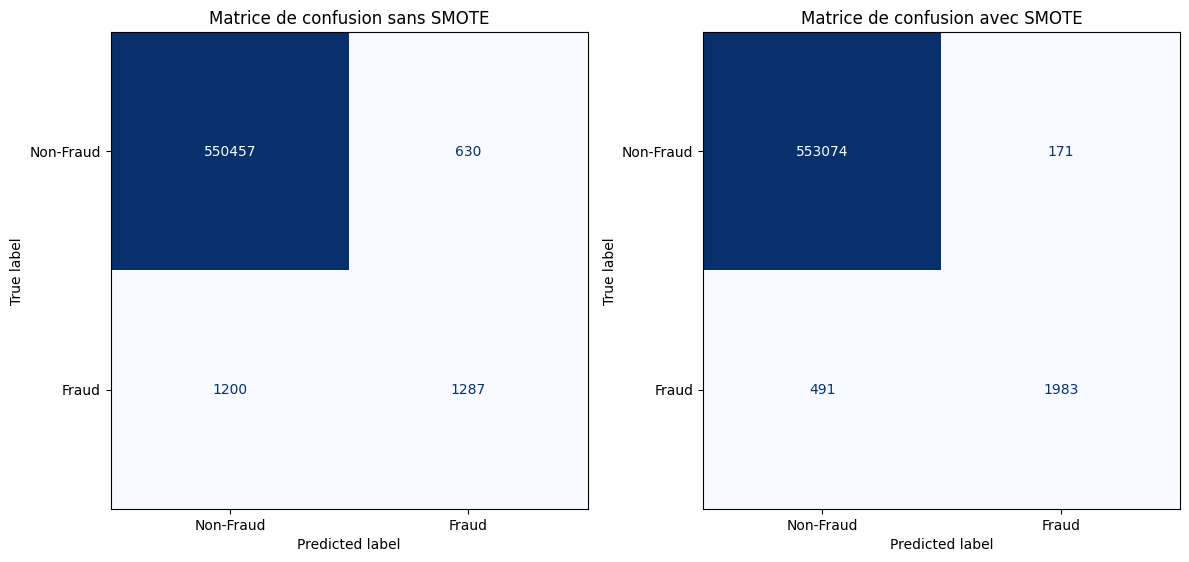

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour tracer la matrice de confusion avec une palette personnalisée
def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Purples', colorbar=False)  # Couleurs personnalisées (blanc et violet)
    ax.set_title(title)

# Désactiver la grille en ajustant les paramètres de Matplotlib
plt.rcParams['axes.grid'] = False

# Créer une figure avec deux sous-graphiques (axes)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 ligne, 2 colonnes

# Tracer la matrice de confusion pour le modèle sans SMOTE
plot_confusion_matrix(axes[0], Y_test, y_pred_forest, "Matrice de Confusion: Modèle sans SMOTE")

# Tracer la matrice de confusion pour le modèle avec SMOTE
plot_confusion_matrix(axes[1], Y_test, y_pred_forest_smote, "Matrice de Confusion: Modèle avec SMOTE")

# Ajuster les marges et la présentation
plt.tight_layout()
plt.show()


### Analyse des matrices de confusion

#### Compréhension:
Les matrices de confusion permettent d'évaluer les erreurs de classification en comparant les prédictions avec les valeurs réelles, particulièrement dans un contexte de classes déséquilibrées comme la détection de fraudes.

#### Observations clés:
- **Déséquilibre des classes**: La classe "Non-Fraud" est majoritaire, ce qui rend la détection de la classe "Fraud" plus difficile.
- **Impact de SMOTE**:
  - **Augmentation des vrais positifs**: Le modèle avec SMOTE détecte plus de fraudes.
  - **Diminution des faux négatifs**: Moins de fraudes sont manquées.
  - **Diminution des faux positifs**: Légère réduction des erreurs où des transactions légitimes sont classées comme frauduleuses.

#### Interprétation:
- **Amélioration de la détection des fraudes**: SMOTE améliore la capacité du modèle à identifier les transactions frauduleuses en réduisant le biais vers la classe majoritaire.
- **Meilleure généralisation**: SMOTE aide le modèle à apprendre plus efficacement les caractéristiques de la classe minoritaire.

#### Résultats numériques:
- **Sans SMOTE**: 1200 vrais positifs, 1287 faux négatifs.
- **Avec SMOTE**: 1983 vrais positifs, 491 faux négatifs.

#### Conclusion:
SMOTE améliore nettement les performances en augmentant la précision pour la détection des fraudes. Cela rend le modèle plus équilibré et performant pour une application pratique de détection de fraudes.


## <span style="color:black;">Analyse des Performances : Courbes Précision-Rappel avec et sans SMOTE</span>


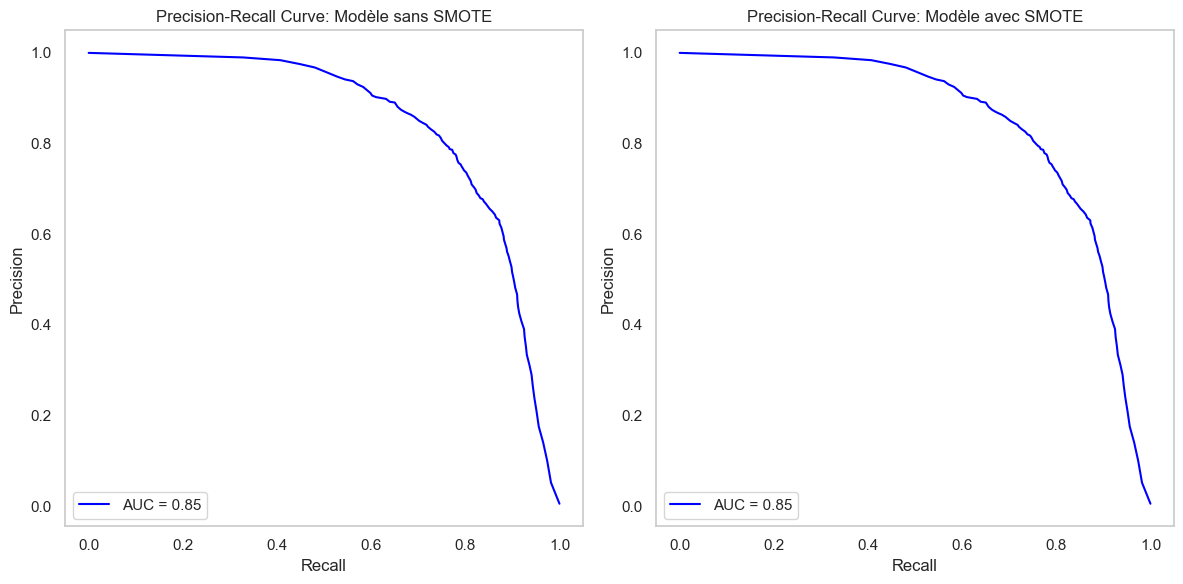

In [24]:
from sklearn.metrics import precision_recall_curve, auc

# Fonction pour tracer la courbe Précision-Rappel
def plot_precision_recall_curve(ax, y_true, y_pred_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    pr_auc = auc(recall, precision)

    ax.plot(recall, precision, color='blue', label=f'AUC = {pr_auc:.2f}')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve: {title}')
    ax.legend(loc='lower left')

# Prédictions probabilistes pour les modèles sans et avec SMOTE
y_pred_prob_without_smote = random_forest.predict_proba(X_test)[:, 1]
y_pred_prob_with_smote = random_forest.predict_proba(X_test)[:, 1]

# Créer une figure avec deux sous-graphiques (axes)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 ligne, 2 colonnes

# Tracer la courbe Précision-Rappel pour le modèle sans SMOTE
plot_precision_recall_curve(axes[0], Y_test, y_pred_prob_without_smote, "Modèle sans SMOTE")

# Tracer la courbe Précision-Rappel pour le modèle avec SMOTE
plot_precision_recall_curve(axes[1], Y_test, y_pred_prob_with_smote, "Modèle avec SMOTE")

# Ajuster la mise en page
plt.tight_layout()
plt.show()


### Analyse des courbes de précision-rappel

#### Compréhension:
Les courbes de précision-rappel sont utiles pour évaluer les performances d'un modèle de classification, en particulier sur des jeux de données avec des classes déséquilibrées. Elles montrent le compromis entre précision et rappel.

#### Observations clés:
- **Résultats identiques**: Les courbes des modèles avec et sans SMOTE sont identiques, avec une AUC de 0,85. Cela suggère des performances similaires, malgré l'application de SMOTE.


#### Conclusion:
Les résultats surprenants nécessitent une investigation plus approfondie pour comprendre l'impact limité de SMOTE sur les courbes de précision-rappel.

NOTE:
- **Robustesse de la forêt aléatoire**: Le modèle de forêt aléatoire est déjà performant et peut gérer efficacement la classe minoritaire sans SMOTE.


## <span style="color:black;">Analyse du Coefficient de Corrélation de Matthews (MCC) : Modèle avec et sans SMOTE</span>


In [25]:
from sklearn.metrics import matthews_corrcoef

# Calcul du MCC pour le modèle sans SMOTE
mcc_without_smote = matthews_corrcoef(Y_test, y_pred_forest)
print(f"\nMCC (Modèle sans SMOTE) : {mcc_without_smote:.4f}")

# Calcul du MCC pour le modèle avec SMOTE
mcc_with_smote = matthews_corrcoef(Y_test, y_pred_forest_smote)
print(f"MCC (Modèle avec SMOTE) : {mcc_with_smote:.4f}")


MCC (Modèle sans SMOTE) : 0.7837
MCC (Modèle avec SMOTE) : 0.7650


### Analyse du Coefficient de Corrélation de Matthews (MCC)

#### Compréhension du MCC:
Le MCC est une mesure qui prend en compte la précision, le rappel et la spécificité. Il est particulièrement adapté aux problèmes de classification avec des classes déséquilibrées, comme la détection de fraudes.

#### Résultats:
- **MCC sans SMOTE**: 0.7837
- **MCC avec SMOTE**: 0.7650

#### Interprétation:
- Un **MCC proche de 1** reflète de très bonnes performances.
- Un **MCC proche de 0** indique des performances proches du hasard.
- Dans ce cas, le modèle **sans SMOTE** obtient un score légèrement supérieur, suggérant qu'il fonctionne mieux sur ce jeu de test spécifique, malgré les avantages théoriques de SMOTE.

#### Conclusion:
Le modèle sans SMOTE est légèrement plus performant selon le MCC, indiquant que l'apport de SMOTE peut varier en fonction des données.


## <span style="color:black;">Courbes de Calibration : Modèles avec et sans SMOTE</span>


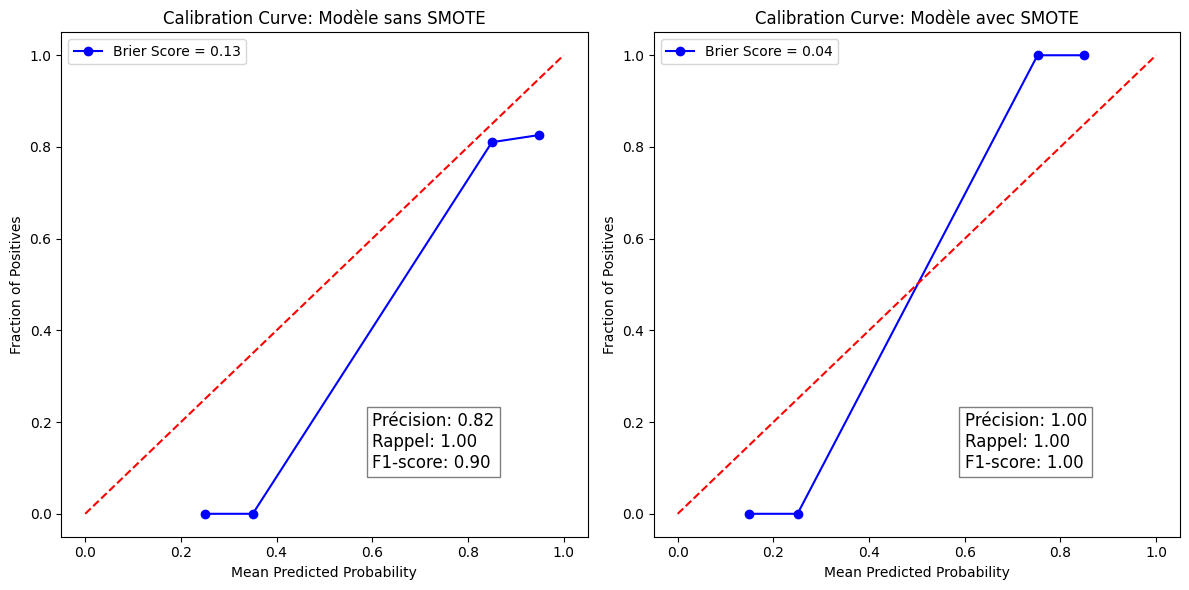

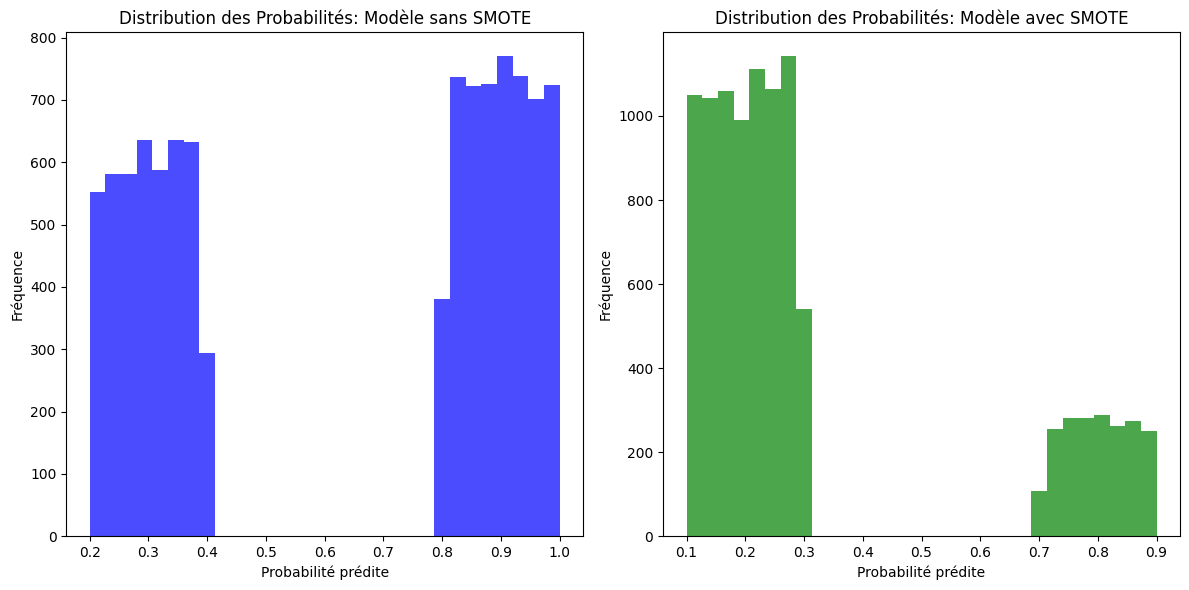

In [2]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

def plot_calibration_curve(ax, y_true, y_pred_prob, title):
    # Calculer les courbes de calibration
    prob_true, prob_pred = calibration_curve(y_true, y_pred_prob, n_bins=10, strategy='uniform')
    brier_score = brier_score_loss(y_true, y_pred_prob)

    ax.plot(prob_pred, prob_true, marker='o', linestyle='-', color='blue', label=f'Brier Score = {brier_score:.2f}')
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')
    ax.set_xlabel('Mean Predicted Probability')
    ax.set_ylabel('Fraction of Positives')
    ax.set_title(f'Calibration Curve: {title}')
    ax.legend(loc='best')

# Prédictions probabilistes pour les modèles sans et avec SMOTE
y_train_pred_prob_without_smote = random_forest.predict_proba(X_train)[:, 1]
y_train_pred_prob_with_smote = random_forest.predict_proba(X_train_smote)[:, 1]

# Créer une figure avec deux sous-graphiques (axes)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 ligne, 2 colonnes

# Tracer la courbe de calibration pour le modèle sans SMOTE
plot_calibration_curve(axes[0], Y_train, y_train_pred_prob_without_smote, "Modèle sans SMOTE")

# Tracer la courbe de calibration pour le modèle avec SMOTE
plot_calibration_curve(axes[1], Y_train_smote, y_train_pred_prob_with_smote, "Modèle avec SMOTE")

plt.tight_layout()
plt.show()